In [75]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from region_mapping import adm2_to_region
import certifi
import ssl
import urllib.request

In [76]:
# loading NDVI CSV by year
years = [2000, 2005, 2010, 2015, 2020]
dfs = []

for year in years:
    df = pd.read_csv(f"Somalia_NDVI_{year}.csv")
    df["year"] = year
    dfs.append(df)

# combine into dataframe
ndvi_df = pd.concat(dfs, ignore_index=True)

ndvi_df.head()

,system:index,ADM0_CODE,ADM0_NAME,ADM1_CODE,ADM1_NAME,DISP_AREA,EXP1_YEAR,STATUS,STR1_YEAR,Shape_Area,Shape_Leng,mean,.geo,year
0,00000000000000000070,226,Somalia,2688,Awdal,NO,3000,Member State,1000,1.310017,6.696929,1294.031672,"{""type"":""GeometryCollection"",""geometries"":[{""t...",2000
1,00000000000000000071,226,Somalia,2689,Bakool,NO,3000,Member State,1000,2.101932,6.650153,2931.859950,"{""type"":""Polygon"",""coordinates"":[[[42.88495151...",2000
2,00000000000000000072,226,Somalia,2690,Bari,NO,3000,Member State,1000,5.626071,12.907711,1430.295216,"{""type"":""GeometryCollection"",""geometries"":[{""t...",2000
3,00000000000000000073,226,Somalia,2691,Bay,NO,3000,Member State,1000,3.573208,8.084147,3599.669506,"{""type"":""Polygon"",""coordinates"":[[[43.12075588...",2000
4,00000000000000000074,226,Somalia,2692,Banadir,NO,3000,Member State,1000,0.017339,0.892716,2457.334106,"{""type"":""GeometryCollection"",""geometries"":[{""t...",2000


In [77]:
ndvi_df = ndvi_df[["ADM1_NAME", "mean", "year"]]

# rename columns for 
ndvi_df = ndvi_df.rename(columns={
    "ADM1_NAME": "Region",
    "mean": "NDVI"
})

ndvi_df.head()

,Region,NDVI,year
0,Awdal,1294.031672,2000
1,Bakool,2931.859950,2000
2,Bari,1430.295216,2000
3,Bay,3599.669506,2000
4,Banadir,2457.334106,2000


In [78]:
# mean of NDVI per region across time
region_trends = ndvi_df.groupby(["Region", "year"])["NDVI"].mean().reset_index()
region_trends.head()


,Region,year,NDVI
0,Awdal,2000,1294.031672
1,Awdal,2005,1243.393177
2,Awdal,2010,1357.014938
3,Awdal,2015,1161.129384
4,Awdal,2020,1687.205025


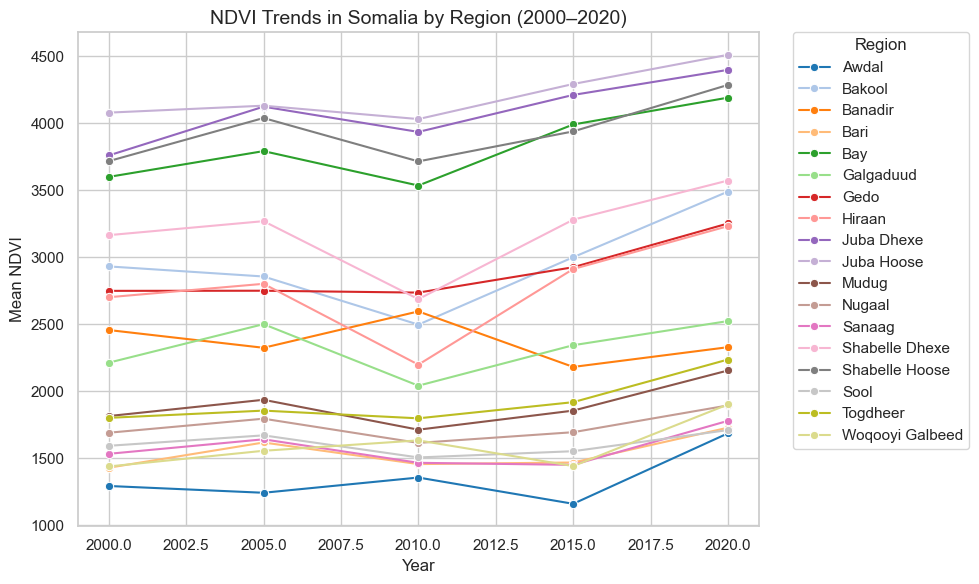

In [79]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=region_trends, x="year", y="NDVI", hue="Region", marker="o", palette="tab20")

plt.title("NDVI Trends in Somalia by Region (2000–2020)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean NDVI", fontsize=12)

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

In [80]:
shapefile_path = "geoBoundaries-SOM-ADM1.shp"  
somalia_gdf = gpd.read_file(shapefile_path)

somalia_gdf.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Hiiraan,SO-HI,83879307B66756469447496,SOM,ADM1,"POLYGON ((44.58957 4.93197, 44.625 4.93286, 44..."
1,Sanaag,SO-SA,83879307B13610404434600,SOM,ADM1,"POLYGON ((46.01 10.08, 46.03039 10.77261, 46.0..."
2,Banadir,SO-BN,83879307B32896531038690,SOM,ADM1,"POLYGON ((45.26926 1.99211, 45.29699 2.02837, ..."
3,Togdheer,SO-TO,83879307B67680758004346,SOM,ADM1,"POLYGON ((46.01 10.08, 46.04843 10.04944, 46.1..."
4,Bakool,SO-BK,83879307B58207540839705,SOM,ADM1,"POLYGON ((44.58957 4.93197, 44.60184 4.87031, ..."


In [81]:
ndvi_2020 = ndvi_df[ndvi_df["year"] == 2020]

In [82]:
map_df = somalia_gdf.merge(ndvi_2020, left_on="shapeName", right_on="Region")

In [83]:
print(somalia_gdf["shapeName"].unique())
print(ndvi_2020["Region"].unique())

['Hiiraan' 'Sanaag' 'Banadir' 'Togdheer' 'Bakool' 'Gedo' 'Middle Shebelle'
 'Woqooyi Galbeed' 'Sool' 'Nugaal' 'Mudug' 'Middle Juba' 'Lower Shebelle'
 'Lower Juba' 'Galgaduud' 'Bay' 'Bari' 'Awdal']
['Awdal' 'Bakool' 'Bari' 'Bay' 'Banadir' 'Galgaduud' 'Gedo' 'Hiraan'
 'Juba Hoose' 'Shabelle Hoose' 'Juba Dhexe' 'Shabelle Dhexe' 'Mudug'
 'Nugaal' 'Sanaag' 'Sool' 'Togdheer' 'Woqooyi Galbeed']


In [84]:
adm1_path = "geoBoundaries-SOM-ADM1.shp"
adm1_gdf = gpd.read_file(adm1_path)

adm1_gdf.head()


,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Hiiraan,SO-HI,83879307B66756469447496,SOM,ADM1,"POLYGON ((44.58957 4.93197, 44.625 4.93286, 44..."
1,Sanaag,SO-SA,83879307B13610404434600,SOM,ADM1,"POLYGON ((46.01 10.08, 46.03039 10.77261, 46.0..."
2,Banadir,SO-BN,83879307B32896531038690,SOM,ADM1,"POLYGON ((45.26926 1.99211, 45.29699 2.02837, ..."
3,Togdheer,SO-TO,83879307B67680758004346,SOM,ADM1,"POLYGON ((46.01 10.08, 46.04843 10.04944, 46.1..."
4,Bakool,SO-BK,83879307B58207540839705,SOM,ADM1,"POLYGON ((44.58957 4.93197, 44.60184 4.87031, ..."


In [85]:
df_2000 = pd.read_csv("Somalia_NDVI_2000.csv")
df_2000["year"] = 2000

df_2000 = df_2000[["ADM1_NAME", "mean", "year"]]
df_2000 = df_2000.rename(columns={"ADM1_NAME": "Region", "mean": "NDVI"})

df_2000["Region"] = df_2000["Region"].replace({
    "Bakol": "Bakool",
    "Nugal": "Nugaal"
})

ndvi_df = pd.concat([ndvi_df, df_2000], ignore_index=True)

In [86]:
print(ndvi_df[ndvi_df["year"] == 2000]["Region"].unique())

['Awdal' 'Bakool' 'Bari' 'Bay' 'Banadir' 'Galgaduud' 'Gedo' 'Hiraan'
 'Juba Hoose' 'Shabelle Hoose' 'Juba Dhexe' 'Shabelle Dhexe' 'Mudug'
 'Nugaal' 'Sanaag' 'Sool' 'Togdheer' 'Woqooyi Galbeed']


Plotting NDVI for 2000 — 26 regions matched.


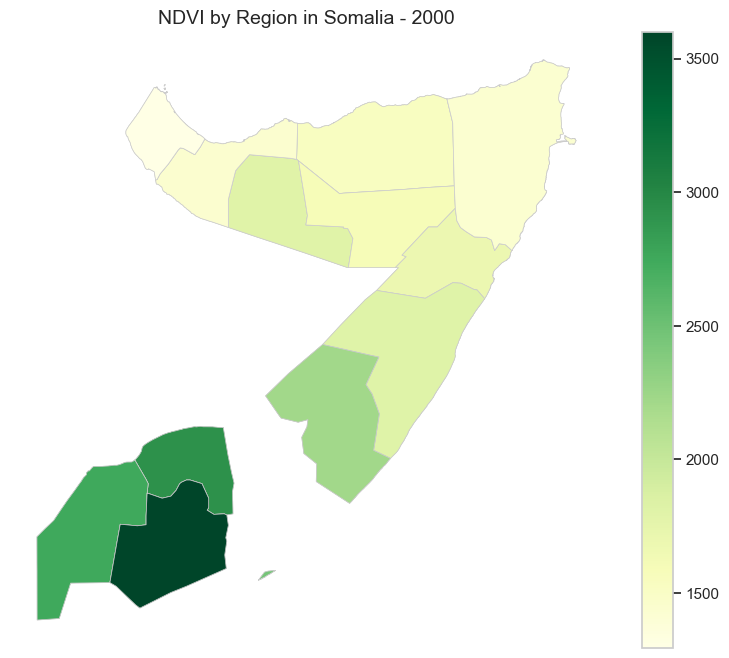

Plotting NDVI for 2005 — 13 regions matched.


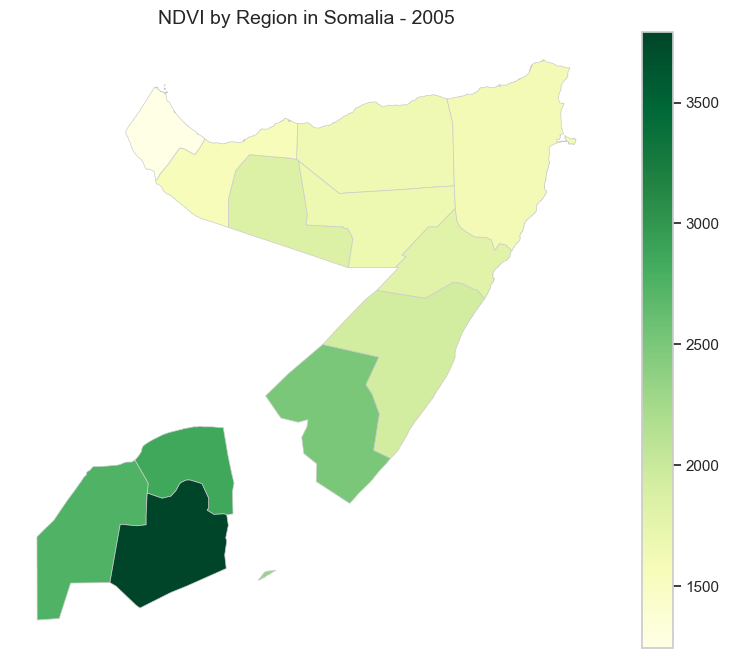

Plotting NDVI for 2010 — 13 regions matched.


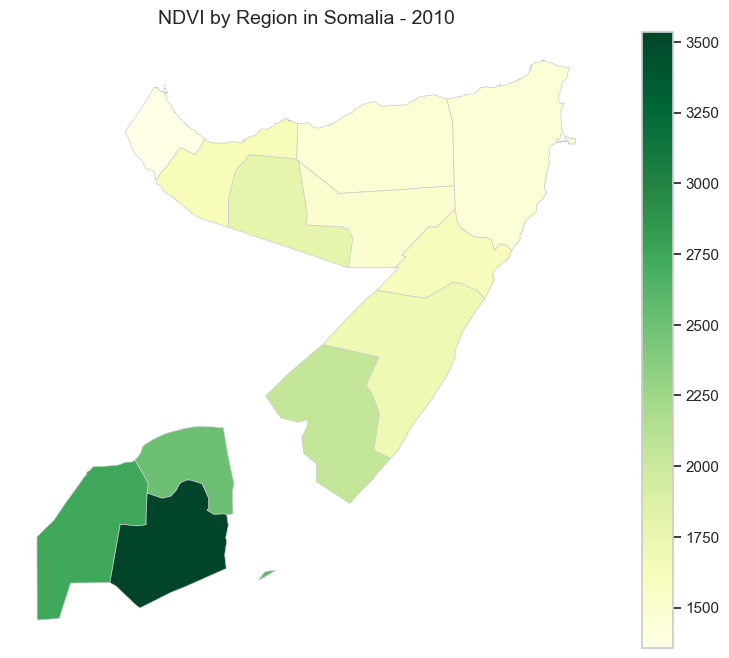

Plotting NDVI for 2015 — 13 regions matched.


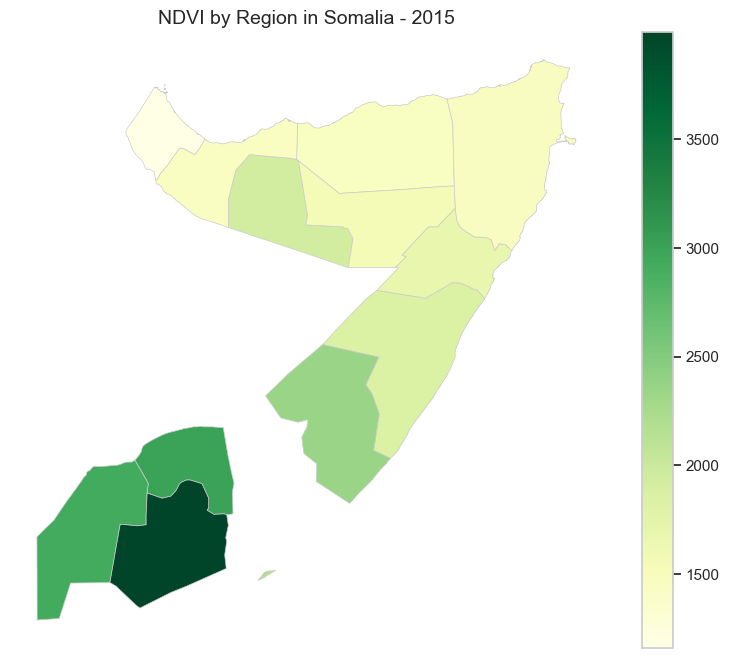

Plotting NDVI for 2020 — 13 regions matched.


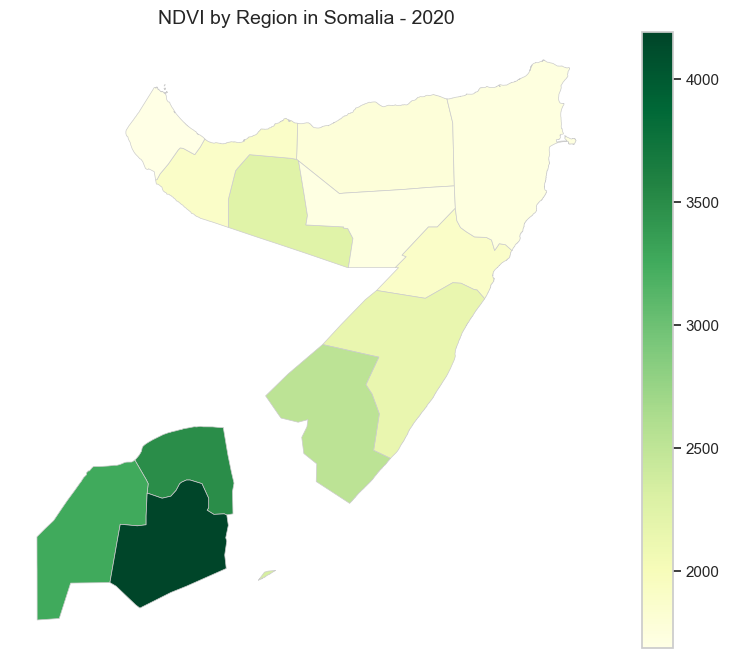

In [87]:
def plot_ndvi_map(year):
    ndvi_year = ndvi_df[ndvi_df["year"] == year]
    merged = adm1_gdf.merge(ndvi_year, left_on="shapeName", right_on="Region")

    if merged.empty:
        print(f"No data to plot for year {year}. Check region name matching.")
        return
    
    print(f"Plotting NDVI for {year} — {len(merged)} regions matched.")

    ax = merged.plot(column="NDVI", cmap="YlGn", legend=True, edgecolor='0.8', linewidth=0.5,
                     figsize=(10, 8))
    ax.set_title(f"NDVI by Region in Somalia - {year}", fontsize=14)
    ax.axis("off")
    plt.show()


for yr in [2000, 2005, 2010, 2015, 2020]:
    plot_ndvi_map(yr)




In [88]:
print(ndvi_df["year"].unique())

[2000 2005 2010 2015 2020]


In [89]:
ndvi_2000 = pd.read_csv("Somalia_NDVI_2000.csv")
ndvi_2000["year"] = 2000

ndvi_2000 = ndvi_2000.rename(columns={"ADM1_NAME": "Region", "mean": "NDVI"})
ndvi_2000 = ndvi_2000[["Region", "NDVI", "year"]]

ndvi_df = pd.concat([ndvi_df, ndvi_2000], ignore_index=True)

print(ndvi_df["year"].unique())


[2000 2005 2010 2015 2020]


In [90]:
def plot_ndvi_change_map(ndvi_df, adm1_gdf, ndvi_2000_path="Somalia_NDVI_2000.csv"):

    ndvi_2000 = pd.read_csv(ndvi_2000_path)
    ndvi_2000["year"] = 2000
    ndvi_2000 = ndvi_2000.rename(columns={"ADM1_NAME": "Region", "mean": "NDVI"})
    ndvi_2000 = ndvi_2000[["Region", "NDVI", "year"]]

    combined_ndvi = pd.concat([ndvi_df, ndvi_2000], ignore_index=True)

    ndvi_change = combined_ndvi[combined_ndvi["year"].isin([2000, 2020])]
    ndvi_change = ndvi_change.groupby(["Region", "year"])["NDVI"].mean().reset_index()

    ndvi_pivot = ndvi_change.pivot(index="Region", columns="year", values="NDVI")

    if 2000 not in ndvi_pivot.columns or 2020 not in ndvi_pivot.columns:
        print("NDVI data for 2000 or 2020 is missing.")
        return
    ndvi_pivot["Change_2000_2020"] = ndvi_pivot[2020] - ndvi_pivot[2000]
    ndvi_pivot = ndvi_pivot.reset_index()

    change_map_df = adm1_gdf.merge(ndvi_pivot, left_on="shapeName", right_on="Region")

    ax = change_map_df.plot(column="Change_2000_2020", cmap="RdYlGn", legend=True,
                            figsize=(10, 8), edgecolor='0.8')
    ax.set_title("NDVI Change (2000–2020) by Region in Somalia", fontsize=14)
    ax.axis("off")
    plt.show()


In [91]:
meta_df = pd.read_csv("metadata-som-rainfall-subnational.csv")
print(meta_df.columns.tolist())

['Field', 'Label', 'Value']


In [92]:
def plot_ndvi_change_map(ndvi_df, adm1_gdf, ndvi_2000_path="Somalia_NDVI_2000.csv"):
    ndvi_2000 = pd.read_csv(ndvi_2000_path)
    ndvi_2000["year"] = 2000
    ndvi_2000 = ndvi_2000.rename(columns={"ADM1_NAME": "Region", "mean": "NDVI"})
    ndvi_2000 = ndvi_2000[["Region", "NDVI", "year"]]

    combined_ndvi = pd.concat([ndvi_df, ndvi_2000], ignore_index=True)

    ndvi_change = combined_ndvi[combined_ndvi["year"].isin([2000, 2020])]
    ndvi_change = ndvi_change.groupby(["Region", "year"])["NDVI"].mean().reset_index()

    ndvi_pivot = ndvi_change.pivot(index="Region", columns="year", values="NDVI")

    if 2000 not in ndvi_pivot.columns or 2020 not in ndvi_pivot.columns:
        print("NDVI data for 2000 or 2020 is missing.")
        return

    ndvi_pivot["Change_2000_2020"] = ndvi_pivot[2020] - ndvi_pivot[2000]
    ndvi_pivot = ndvi_pivot.reset_index()

    change_map_df = adm1_gdf.merge(ndvi_pivot, left_on="shapeName", right_on="Region")

    ax = change_map_df.plot(column="Change_2000_2020", cmap="RdYlGn", legend=True,
                            figsize=(10, 8), edgecolor='0.8')
    ax.set_title("NDVI Change (2000–2020) by Region in Somalia", fontsize=14)
    ax.axis("off")
    plt.show()


 Rainfall

In [93]:
rainfall_df = pd.read_csv("som-rainfall-adm2-full.csv", low_memory=False)
rainfall_df["date"] = pd.to_datetime(rainfall_df["date"], errors="coerce")
rainfall_df["year"] = rainfall_df["date"].dt.year

rainfall_df["region"] = rainfall_df["ADM2_PCODE"]
rainfall_df["rfh_avg"] = pd.to_numeric(rainfall_df["rfh_avg"], errors="coerce")

filtered_df = rainfall_df[rainfall_df["year"].isin([2000, 2020])]

rainfall_grouped = filtered_df.groupby(["region", "year"])["rfh_avg"].mean().reset_index()

rainfall_pivot = rainfall_grouped.pivot(index="region", columns="year", values="rfh_avg")
rainfall_pivot.columns = ["Rainfall_2000", "Rainfall_2020"]
rainfall_pivot["Change_2000_2020"] = rainfall_pivot["Rainfall_2020"] - rainfall_pivot["Rainfall_2000"]

rainfall_pivot = rainfall_pivot.dropna(subset=["Change_2000_2020"]).reset_index()

print(rainfall_pivot.head())

   region  Rainfall_2000  Rainfall_2020  Change_2000_2020
0  SO1101      11.147461      11.147461               0.0
1  SO1102       6.685586       6.685586               0.0
2  SO1103       3.408236       3.408236               0.0
3  SO1104       4.085128       4.085128               0.0
4  SO1201       8.828836       8.828836               0.0


/var/folders/kx/sx1n54md3m186sp0nhxr3xkw0000gn/T/ipykernel_92782/3839722308.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rainfall_df["date"] = pd.to_datetime(rainfall_df["date"], errors="coerce")


In [95]:

import ee
import geemap

# Initialize the Earth Engine API
ee.Initialize()

# Define Somalia bounding box (approximate)
somalia_bounds = ee.Geometry.Polygon([
    [[41, -1], [51, -1], [51, 12], [41, 12], [41, -1]]
])

# Load CHIRPS daily rainfall dataset
chirps = ee.ImageCollection("UCSB-CHG/CHIRPS/DAILY") \
    .filterDate("2000-01-01", "2020-12-31") \
    .filterBounds(somalia_bounds)

# Function to sum daily rainfall per year
def annual_rainfall(year):
    start = ee.Date.fromYMD(year, 1, 1)
    end = start.advance(1, 'year')
    image = chirps.filterDate(start, end).sum()
    return image.set({'year': year, 'system:time_start': start.millis()})

# Create an image collection of annual totals from 2000–2020
years = list(range(2000, 2021))
annual_collection = ee.ImageCollection([annual_rainfall(y) for y in years])

# Reduce to mean over Somalia per year
rainfall_stats = annual_collection.map(
    lambda img: img.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=somalia_bounds,
        scale=5000,
        maxPixels=1e9
    ).set('year', img.get('year'))
)

# Convert to a feature collection
rainfall_fc = ee.FeatureCollection(rainfall_stats.map(lambda d: ee.Feature(None, d)))

# Print (for debugging) — or export
geemap.ee_to_pandas(rainfall_fc).sort_values("year")


EEException: Please authorize access to your Earth Engine account by running

earthengine authenticate

in your command line, or ee.Authenticate() in Python, and then retry.

In [ ]:
ax = rainfall_map_df.plot(
    column="Change_2000_2020",
    cmap="Blues",
    legend=True,
    figsize=(10, 8),
    edgecolor='0.8',
    vmin=-5,  # exaggerate difference range
    vmax=5
)


NameError: name 'rainfall_map_df' is not defined

In [ ]:
print(rainfall_pivot["Change_2000_2020"].describe())

count    8.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: Change_2000_2020, dtype: float64


In [ ]:
rainfall_summary[rainfall_summary["year"] == 2000].head()
rainfall_summary[rainfall_summary["year"] == 2020].head()


,Region,year,Rainfall
20,Bakool,2020,7.080428
41,Banadir,2020,7.869110
62,Bay,2020,4.867221
83,Galgaduud,2020,3.115819
104,Gedo,2020,4.390013


In [ ]:
comparison = rainfall_summary[rainfall_summary["Region"].isin(["Bay", "Gedo", "Bakool"])]
print(comparison[comparison["year"].isin([2000, 2020])])


NameError: name 'rainfall_summary' is not defined

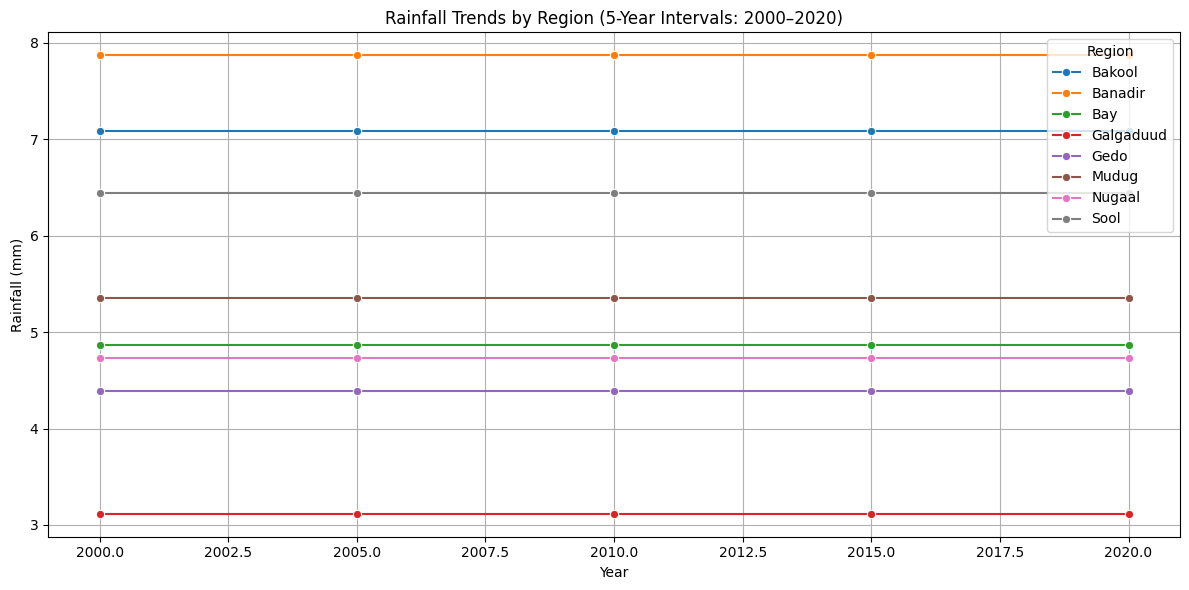

In [ ]:
five_years = [2000, 2005, 2010, 2015, 2020]
rainfall_5yr = rainfall_summary[rainfall_summary["year"].isin(five_years)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=rainfall_5yr, x="year", y="Rainfall", hue="Region", marker="o")
plt.title("Rainfall Trends by Region (5-Year Intervals: 2000–2020)")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/kx/sx1n54md3m186sp0nhxr3xkw0000gn/T/ipykernel_81663/75248376.py:1: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  rainfall_df = pd.read_csv("som-rainfall-adm2-full.csv")


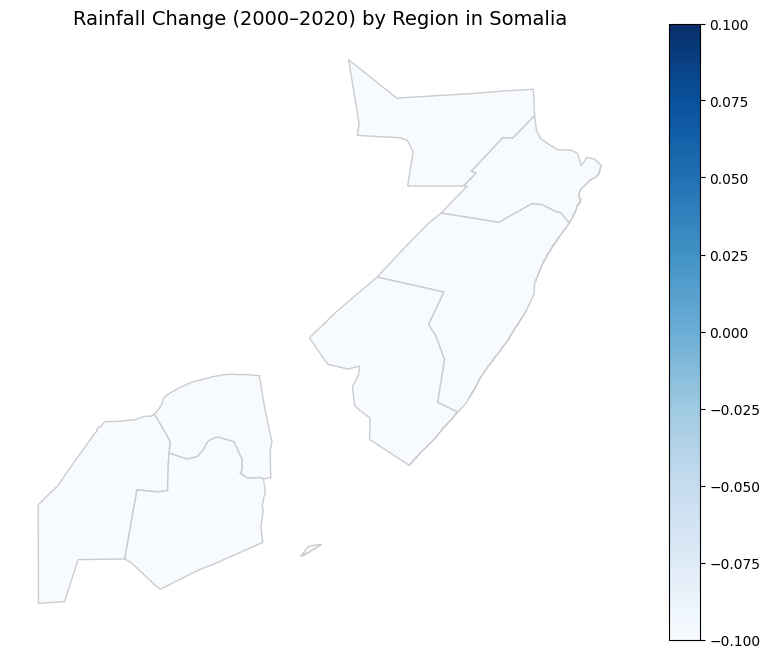

In [ ]:
rainfall_df = pd.read_csv("som-rainfall-adm2-full.csv")
rainfall_df = rainfall_df.iloc[1:].copy()
rainfall_df["date"] = pd.to_datetime(rainfall_df["date"], errors="coerce")
rainfall_df["year"] = rainfall_df["date"].dt.year
rainfall_df = rainfall_df[(rainfall_df["year"] >= 2000) & (rainfall_df["year"] <= 2020)]
rainfall_df["rfh_avg"] = pd.to_numeric(rainfall_df["rfh_avg"], errors="coerce")
rainfall_df["Region"] = rainfall_df["ADM2_PCODE"].map(adm2_to_region)
rainfall_df = rainfall_df.dropna(subset=["Region", "rfh_avg"])

rainfall_summary = rainfall_df.groupby(["Region", "year"])["rfh_avg"].mean().reset_index()
rainfall_summary = rainfall_summary.rename(columns={"rfh_avg": "Rainfall"})

rainfall_change = rainfall_summary[rainfall_summary["year"].isin([2000, 2020])]
rainfall_pivot = rainfall_change.pivot(index="Region", columns="year", values="Rainfall").reset_index()
rainfall_pivot["Change_2000_2020"] = rainfall_pivot[2020] - rainfall_pivot[2000]

adm1_gdf = gpd.read_file("geoBoundaries-SOM-ADM1.shp")
rainfall_map_df = adm1_gdf.merge(rainfall_pivot, left_on="shapeName", right_on="Region")

ax = rainfall_map_df.plot(column="Change_2000_2020", cmap="Blues", legend=True,
                          figsize=(10, 8), edgecolor='0.8')
ax.set_title("Rainfall Change (2000–2020) by Region in Somalia", fontsize=14)
ax.axis("off")
plt.show()


CDD

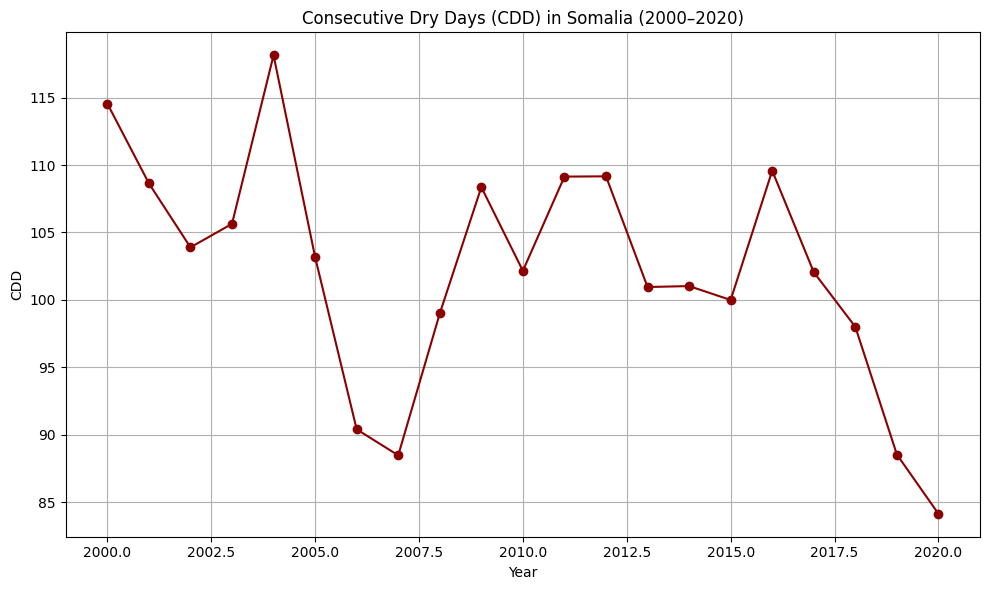

In [ ]:

climate_path = "era5-x0.25_timeseries_cdd,pr,tas_timeseries_annual_1950-2022_mean_historical_era5_x0.25_mean.xlsx"
xls = pd.ExcelFile(climate_path)

df_cdd = xls.parse("cdd")

df_cdd_long = df_cdd.melt(id_vars=["code", "name"], var_name="year_raw", value_name="CDD")

df_cdd_long["year"] = df_cdd_long["year_raw"].str.extract(r"(\d{4})").astype(int)
df_cdd_long = df_cdd_long[df_cdd_long["name"] == "Somalia"]
df_cdd_long = df_cdd_long[(df_cdd_long["year"] >= 2000) & (df_cdd_long["year"] <= 2020)]

plt.figure(figsize=(10, 6))
plt.plot(df_cdd_long["year"], df_cdd_long["CDD"], marker="o", color="darkred")
plt.title("Consecutive Dry Days (CDD) in Somalia (2000–2020)")
plt.xlabel("Year")
plt.ylabel("CDD")
plt.grid(True)
plt.tight_layout()
plt.show()

Merging Data

In [ ]:
climate_df = ndvi_df.merge(rainfall_summary, on=["Region", "year"], how="inner")
climate_df = climate_df.merge(df_cdd_long[["year", "CDD"]], on="year", how="left")  # CDD is national level


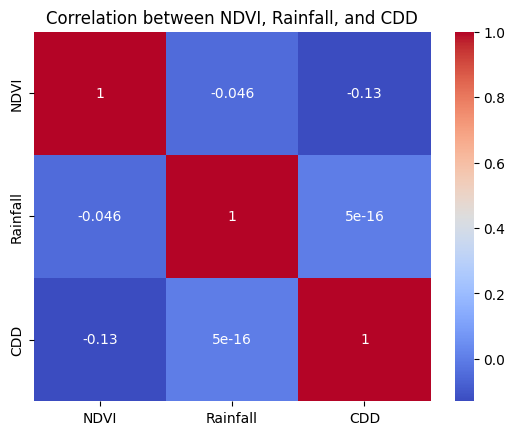

In [ ]:
sns.heatmap(climate_df[["NDVI", "Rainfall", "CDD"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between NDVI, Rainfall, and CDD")
plt.show()